In [44]:
#Setup
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
# Merget data
cc_fraud1 = pd.read_csv("/Users/sarakleine-kracht/Desktop/SKpersonal_Project1/fraudTest.csv")
cc_fraud2 = pd.read_csv("/Users/sarakleine-kracht/Desktop/SKpersonal_Project1/credit_card_fraud (3).csv")

In [46]:
# don't need: unnamed, cc_number, first, last, street, merchant, trans_num, job, unix_time, is fraud
cc_frauddf1 = cc_fraud1[["trans_date_trans_time", "category", "amt", "gender", "city", "state", "lat", "long", "city_pop", "dob", "merch_lat", "merch_long"]]
cc_frauddf1.head()

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,dob,merch_lat,merch_long
0,2020-06-21 12:14:25,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,1968-03-19,33.986391,-81.200714
1,2020-06-21 12:14:33,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,1990-01-17,39.450498,-109.960431
2,2020-06-21 12:14:53,health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,1970-10-21,40.495810,-74.196111
3,2020-06-21 12:15:15,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,1987-07-25,28.812398,-80.883061
4,2020-06-21 12:15:17,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,1955-07-06,44.959148,-85.884734


In [47]:
cc_frauddf2 = cc_fraud2[["trans_date_trans_time", "category", "amt", "city", "state", "lat", "long", "city_pop", "dob", "merch_lat", "merch_long"]]
cc_frauddf2.head()

,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,merch_lat,merch_long
0,2019-01-01 00:00:44,grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462
1,2019-01-01 00:00:51,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481
2,2019-01-01 00:07:27,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,1945-12-21,41.657520,-122.230347
3,2019-01-01 00:09:03,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,1967-08-30,32.863258,-106.520205
4,2019-01-01 00:21:32,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,1967-08-02,43.753735,-111.454923


In [48]:
cc_data = pd.merge(cc_frauddf1, cc_frauddf2, on="trans_date_trans_time")
cc_data.head()

,trans_date_trans_time,category_x,amt_x,gender,city_x,state_x,lat_x,long_x,city_pop_x,dob_x,...,category_y,amt_y,city_y,state_y,lat_y,long_y,city_pop_y,dob_y,merch_lat_y,merch_long_y
0,2020-06-21 12:14:33,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,1990-01-17,...,personal_care,29.84,Altonah,UT,40.3207,-110.4360,302,1990-01-17,39.450498,-109.960431
1,2020-06-21 12:15:44,health_fitness,133.93,F,Carlotta,CA,40.5070,-123.9743,1139,1951-01-15,...,health_fitness,133.93,Carlotta,CA,40.5070,-123.9743,1139,1951-01-15,41.499458,-124.888729
2,2020-06-21 12:16:47,kids_pets,42.40,M,Fort Washakie,WY,43.0048,-108.8964,1645,1976-02-26,...,kids_pets,42.40,Fort Washakie,WY,43.0048,-108.8964,1645,1976-02-26,42.687774,-108.670054
3,2020-06-21 12:20:42,kids_pets,37.95,F,Colorado Springs,CO,38.8881,-104.6556,525713,1992-05-09,...,kids_pets,37.95,Colorado Springs,CO,38.8881,-104.6556,525713,1992-05-09,39.844711,-103.975632
4,2020-06-21 12:23:08,food_dining,47.06,F,Daly City,CA,37.6787,-122.4780,107941,1991-10-04,...,food_dining,47.06,Daly City,CA,37.6787,-122.4780,107941,1991-10-04,38.048242,-123.125680


In [72]:
cc_data = pd.merge(cc_frauddf1, cc_frauddf2, how = "left", on=["trans_date_trans_time", "category", "city", "state", "lat", "long", "city_pop", "dob", "merch_lat", "merch_long", "amt"]) 
cc_data.head()

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,dob,merch_lat,merch_long
0,2020-06-21 12:14:25,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,1968-03-19,33.986391,-81.200714
1,2020-06-21 12:14:33,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,1990-01-17,39.450498,-109.960431
2,2020-06-21 12:14:53,health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,1970-10-21,40.495810,-74.196111
3,2020-06-21 12:15:15,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,1987-07-25,28.812398,-80.883061
4,2020-06-21 12:15:17,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,1955-07-06,44.959148,-85.884734


Fraudulent Transaction Category Analysis

In [75]:
base_category = pd.DataFrame(cc_data["category"].value_counts())
base_category

,count
category,
gas_transport,56370
grocery_pos,52553
home,52345
shopping_pos,49791
kids_pets,48692
shopping_net,41779
entertainment,40104
personal_care,39327
food_dining,39268


In [82]:
category_df = cc_data["category"].value_counts().to_string(header=False)

#category_total2 = category_total.reset_index(drop=True)
print("The total number of fraudulent transactions per category is: ")
print(category_df)

The total number of fraudulent transactions per category is: 
gas_transport     56370
grocery_pos       52553
home              52345
shopping_pos      49791
kids_pets         48692
shopping_net      41779
entertainment     40104
personal_care     39327
food_dining       39268
health_fitness    36674
misc_pos          34574
misc_net          27367
grocery_net       19426
travel            17449


The category with the highest number of fraudulent transactions is gas and transport with 56,370 transactions. 

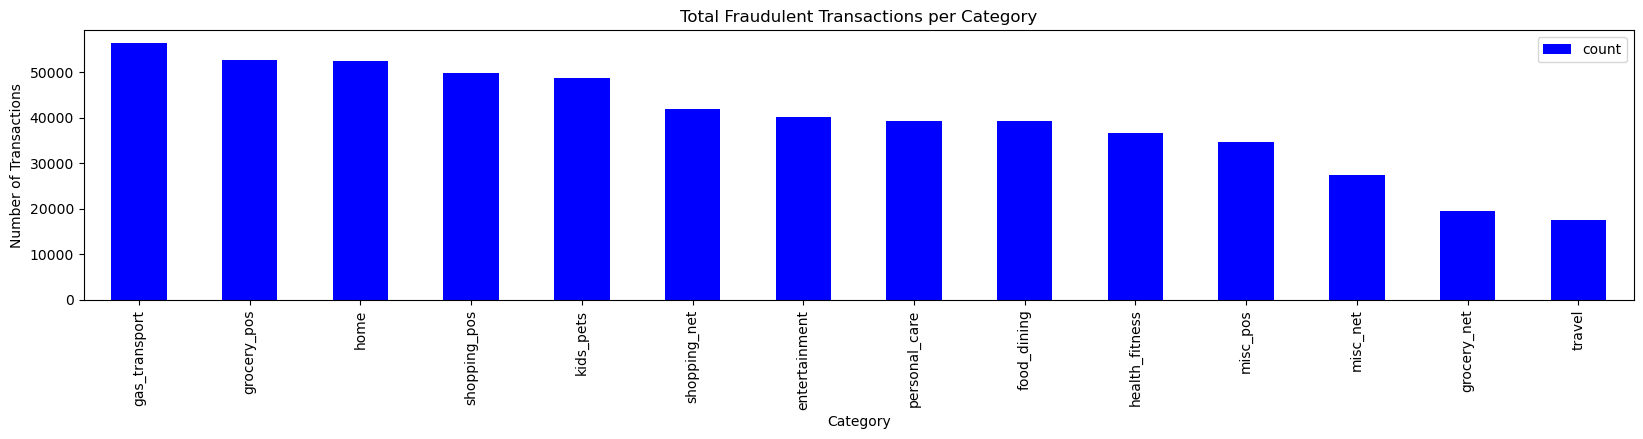

<Figure size 640x480 with 0 Axes>

In [81]:

category_bar = base_category.plot(kind="bar", color= 'b', figsize=(20,3.5))
# PandasPlot.set_xticklabels() can be used to set the tick labels as well
plt.title("Total Fraudulent Transactions per Category")
plt.xlabel("Category")
plt.ylabel("Number of Transactions")
plt.show()
plt.tight_layout()
#plt.xticks(labels= "Gas Transport", "Grocery (In Store)", "Home", "Shopping (In Store)", "Kids_Pets", "Shopping (Online)", "Personal Care", "Entertainment", "Food and Dining", "Health and Fitness", "Misc", "Grocery (Online)", "Travel")